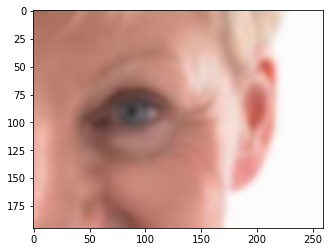

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

path = r'C:\Users\Umang\OneDrive\Desktop\age dataset\age dataset\images\wrinkles on face\Image_10.jpg'
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.GaussianBlur(image,(15,15),0)

plt.imshow(image)
plt.show()

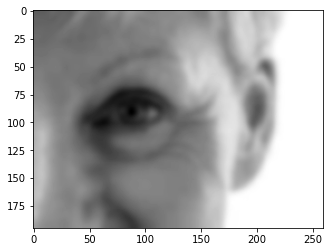

In [2]:
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(image_gray,  cmap='gray')
plt.show()

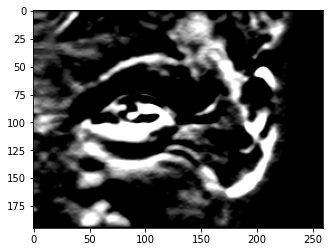

In [3]:
sobely = cv2.Sobel(image_gray, cv2.CV_8UC1, 0, 1, ksize=5)

plt.imshow(sobely,  cmap='gray')
plt.show()



In [4]:
# Create the haar cascade
face_cascade = cv2.CascadeClassifier(r"C:\Users\Umang\anaconda3\Lib\site-packages\cv2\data\haarcascade_righteye_2splits.xml")
faces = face_cascade.detectMultiScale(image_gray,scaleFactor = 1.05,minNeighbors=10)
for x,y,w,h in faces :
    cropped_img = image[y:y+h,x:x+w]
    edges = cv2.Canny(cropped_img,110,1000)        
    number_of_edges = np.count_nonzero(edges)

    

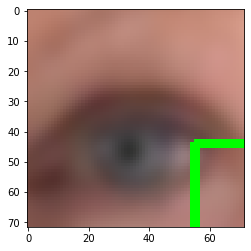

In [5]:
# Draw a rectangle around the wrinkles
for (x, y, w, h) in faces:
    img = cv2.rectangle(cropped_img, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.imshow(img)
plt.show()
    

## Dark spots

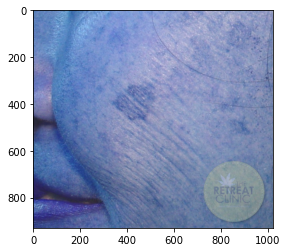

In [6]:
import cv2
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
import matplotlib.pyplot as plt
import numpy as np
nemo = cv2.imread(r'C:\Users\Umang\OneDrive\Desktop\age dataset\age dataset\images\age spots\Image_1.jpg')
plt.imshow(nemo)
plt.show()

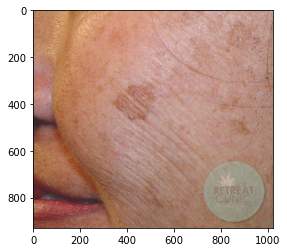

In [7]:
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.show()

In [8]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)


In [9]:
light_white
dark_white

(145, 60, 255)

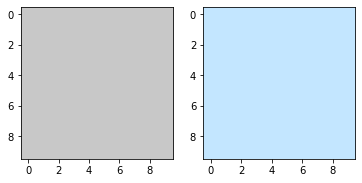

In [10]:
from matplotlib.colors import hsv_to_rgb
lw_square = np.full((10, 10, 3), light_white, dtype=np.uint8) / 255.0
dw_square = np.full((10, 10, 3), dark_white, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lw_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(dw_square))
plt.show()

In [11]:
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)

In [12]:
mask = cv2.inRange(hsv_nemo, light_white, dark_white)
result = cv2.bitwise_and(nemo, nemo, mask=mask)

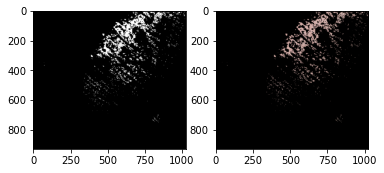

In [13]:
mask_white = cv2.inRange(hsv_nemo, light_white, dark_white)
result_white = cv2.bitwise_and(nemo, nemo, mask=mask_white)

plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()

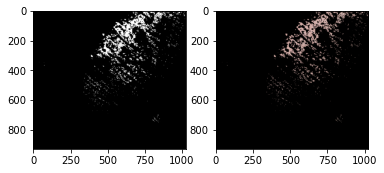

In [14]:
final_mask = mask + mask_white

final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

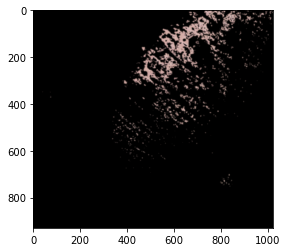

In [15]:
blur = cv2.GaussianBlur(final_result, (7, 7), 0)
plt.imshow(blur)
plt.show()

## Puffy eyes

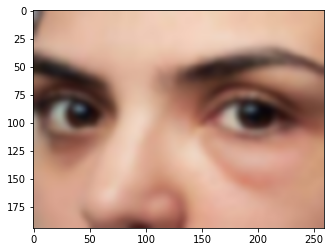

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

path = r'C:\Users\Umang\OneDrive\Desktop\age dataset\age dataset\images\puffy eyes\download(5).jpg'
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.GaussianBlur(image,(15,15),0)

plt.imshow(image)
plt.show()


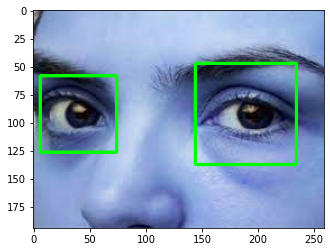

In [17]:
import numpy as np
import cv2

face_cascade = cv2.CascadeClassifier(r'C:\Users\Umang\anaconda3\Lib\site-packages\cv2\data\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(r'C:\Users\Umang\anaconda3\Lib\site-packages\cv2\data\haarcascade_eye.xml')

img = cv2.imread(r'C:\Users\Umang\OneDrive\Desktop\age dataset\age dataset\images\puffy eyes\download(5).jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


#faces = face_cascade.detectMultiScale(gray, 1.3, 5)
#for (x,y,w,h) in faces:
        #cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        #roi_gray = gray[y:y+h, x:x+w]
        #roi_color = img[y:y+h, x:x+w]
eyes = eye_cascade.detectMultiScale(gray, 1.3, 5)
for (ex,ey,ew,eh) in eyes:
    img = cv2.rectangle(img,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    
plt.imshow(img)
plt.show()
